In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

dtrain=pd.read_csv("train.csv")
dtest=pd.read_csv("test.csv")

In [3]:
 dtest.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
dtrain.drop('User_ID', axis=1, inplace=True)

In [6]:
# categorical to numerical for gender
dtrain['Gender'].replace({'F':0,'M':1},inplace=True)

C:\Users\ddali\AppData\Local\Temp\ipykernel_36308\1779542608.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dtrain['Gender'].replace({'F':0,'M':1},inplace=True)
C:\Users\ddali\AppData\Local\Temp\ipykernel_36308\1779542608.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dtrain['Gender'].repl

In [7]:
dtrain.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
# categorical to numerical for age 
dtrain['Age'].replace({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6},inplace=True)


C:\Users\ddali\AppData\Local\Temp\ipykernel_36308\2184734332.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dtrain['Age'].replace({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6},inplace=True)
C:\Users\ddali\AppData\Local\Temp\ipykernel_36308\2184734332.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no

In [9]:
# categorical to numerical for cities
dtrain = pd.get_dummies(dtrain, columns=['City_Category'])

In [10]:
dtrain.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370,True,False,False
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200,True,False,False
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422,True,False,False
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057,True,False,False
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969,False,False,True


In [11]:
# missing values
dtrain.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
City_Category_A                    0
City_Category_B                    0
City_Category_C                    0
dtype: int64

In [12]:
dtrain['Product_Category_2'].value_counts()

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [13]:
# replace with mode
dtrain['Product_Category_2'].fillna(dtrain['Product_Category_2'].mode()[0], inplace=True)
dtrain.head()

C:\Users\ddali\AppData\Local\Temp\ipykernel_36308\4278098851.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dtrain['Product_Category_2'].fillna(dtrain['Product_Category_2'].mode()[0], inplace=True)


,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
0,P00069042,0,0,10,2,0,3,8.0,NaN,8370,True,False,False
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200,True,False,False
2,P00087842,0,0,10,2,0,12,8.0,NaN,1422,True,False,False
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057,True,False,False
4,P00285442,1,6,16,4+,0,8,8.0,NaN,7969,False,False,True


In [14]:
#stay in current years
dtrain['Stay_In_Current_City_Years'].replace({'0':0,'1':1,'2':2,'3':3,'4+':4},inplace=True)

C:\Users\ddali\AppData\Local\Temp\ipykernel_36308\1580836761.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dtrain['Stay_In_Current_City_Years'].replace({'0':0,'1':1,'2':2,'3':3,'4+':4},inplace=True)
C:\Users\ddali\AppData\Local\Temp\ipykernel_36308\1580836761.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downc

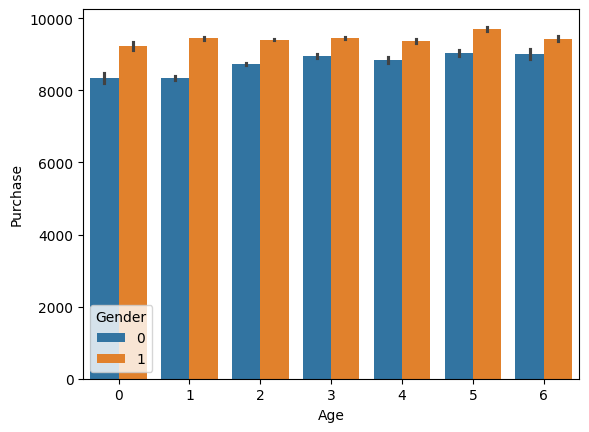

In [15]:
sns.barplot(x='Age', y='Purchase', hue='Gender', data=dtrain)
plt.show()

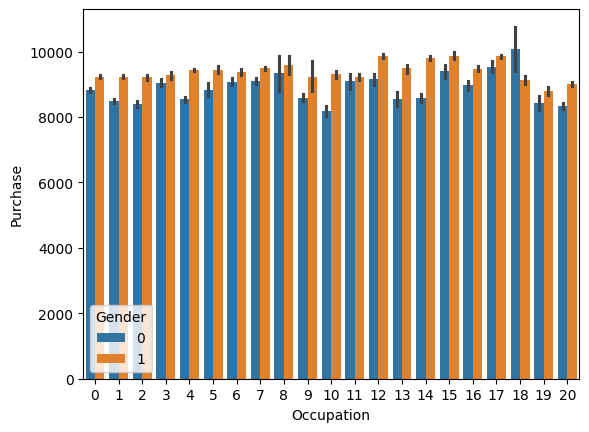

In [16]:
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=dtrain)
plt.show()

In [17]:
dtrain.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_A,City_Category_B,City_Category_C
0,P00069042,0,0,10,2,0,3,8.0,NaN,8370,True,False,False
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200,True,False,False
2,P00087842,0,0,10,2,0,12,8.0,NaN,1422,True,False,False
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057,True,False,False
4,P00285442,1,6,16,4,0,8,8.0,NaN,7969,False,False,True


In [18]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dtrain.drop('Purchase', axis=1), dtrain['Purchase'], test_size=0.2, random_state=42)

In [20]:
X_train.drop('Product_ID', axis=1, inplace=True)
X_test.drop('Product_ID', axis=1, inplace=True)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)